# Load the old model from Part I

In [30]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [16]:
import pandas as pd
df = pd.read_csv("nba.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 52 columns):
Number                           486 non-null int64
Season_Start                     486 non-null int64
Player_Name                      486 non-null object
Salary                           484 non-null float64
Position                         486 non-null object
Age                              486 non-null int64
Team                             486 non-null object
Games_Played                     486 non-null int64
Games_Started                    486 non-null int64
Minutes_Played                   486 non-null int64
Player_Efficiency_Rating         486 non-null float64
True_Shooting_Pct                485 non-null float64
Three_Point_Attempt_Rate         485 non-null float64
Free_Throw_Rate                  485 non-null float64
Offensive_Rebound_Pct            486 non-null float64
Defensive_Rebound_Pct            486 non-null float64
Total_Rebound_Pct                486 non-null 

This code chunk will change all of object classes to numerical values.

In [17]:
# Data transformation
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df[i] = d[i].transform(df[i])

The `features` DataFrame is everything but Salary (which is what we want to predict).  

Salary will be its own DataFrame called `labels`.

In [18]:
features = df[df.columns.difference(["Salary"])]
labels = df["Salary"]

There are some null values that we need to replace with 0.

In [20]:
pd.set_option('display.max_rows', 500)
labels.isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [21]:
labels = labels.fillna(0)

In [22]:
pd.set_option('display.max_columns', 500)
features.isnull().values.any()

True

In [23]:
features.isnull().sum()

Age                               0
Assists                           0
Assists_Pct                       0
Blocks                            0
Blocks_Pct                        0
Box_Plus_Minus                    0
Defensive_Box_Plus_Minus          0
Defensive_Rebound_Pct             0
Defensive_Rebounds                0
Defensive_Win_Shares              0
Effective_Field_Goal_Pct          1
Field_Goal_Pct                    1
Field_Goals                       0
Field_Goals_Attempted             0
Free_Throw_Rate                   1
Free_Throws                       0
Free_Throws_Attempted             0
Free_Throws_Pct                  15
Games_Played                      0
Games_Started                     0
Minutes_Played                    0
Number                            0
Offensive_Box_Plus_Minus          0
Offensive_Rebound_Pct             0
Offensive_Rebounds                0
Offensive_Win_Shares              0
Personal_Fouls                    0
Player_Efficiency_Rating    

In [24]:
features = features.fillna(0)
features.isnull().sum()

Age                              0
Assists                          0
Assists_Pct                      0
Blocks                           0
Blocks_Pct                       0
Box_Plus_Minus                   0
Defensive_Box_Plus_Minus         0
Defensive_Rebound_Pct            0
Defensive_Rebounds               0
Defensive_Win_Shares             0
Effective_Field_Goal_Pct         0
Field_Goal_Pct                   0
Field_Goals                      0
Field_Goals_Attempted            0
Free_Throw_Rate                  0
Free_Throws                      0
Free_Throws_Attempted            0
Free_Throws_Pct                  0
Games_Played                     0
Games_Started                    0
Minutes_Played                   0
Number                           0
Offensive_Box_Plus_Minus         0
Offensive_Rebound_Pct            0
Offensive_Rebounds               0
Offensive_Win_Shares             0
Personal_Fouls                   0
Player_Efficiency_Rating         0
Player_Name         

Now we can subset the data to include only the relevant features defined in Part I of this project.  These were:  
Age, Player_Efficiency_Rating, Blocks, Turnovers_Pct, Steals, Assists_Pct, Games_Started, Games_Played, Total_Rebounds, Field_Goals, Defensive_Box_Plus_Minus, Defensive_Rebound_Pct, Usage_Pct, and Free_Throws.

In [25]:
nba_subset = df[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws
0,1312611.0,24,8.4,13,16.4,1,3.8,0,22,36,17,1.9,20.9,17.6,9
1,2116955.0,32,9.5,9,17.2,25,20.7,0,65,69,121,-2.6,6.3,19.2,32
2,5504420.0,21,14.4,40,8.5,64,10.5,72,80,405,393,-0.4,14.1,20.1,156
3,365289.0,22,-2.2,0,0.0,0,22.6,0,5,3,0,-2.1,19.5,12.9,1
4,2022240.0,25,14.4,7,11.4,8,8.0,0,18,33,23,0.7,21.0,23.1,14


We now need to get our dataset ready for our model.  

The *first line* of code below creates an object of the target variable called "target_column".  
The *second line* gives us the list of all the features, excluding the target variable of Salary.  
The *third line* normalizes the predictors.  This is done because the units of the variables differ significantly and may influence the modeling process. To prevent this, we will do normalization via scaling of the predictors between 0 and 1.  
The *fourth line* displays the summary of the normalized data.  We can see that all the independent variables have now been scaled between 0 and 1. The target variable (Salary) remains unchanged.

In [26]:
import warnings
warnings.filterwarnings("ignore")

target_column = ['Salary'] 
predictors = list(set(list(nba_subset.columns))-set(target_column))
nba_subset[predictors] = nba_subset[predictors]/nba_subset[predictors].max()
nba_subset.describe()

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws
count,4.840000e+02,486.000000,486.000000,486.000000,485.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,6.717244e+06,0.660134,0.413358,0.112342,0.293786,0.248395,0.228058,0.308642,0.655902,0.197394,0.239874,-0.025394,0.152119,0.446255,0.121038
std,7.376188e+06,0.108630,0.182934,0.136705,0.122302,0.208235,0.160085,0.350194,0.302874,0.178025,0.211975,0.169428,0.073374,0.134222,0.146365
min,1.722400e+04,0.475000,-0.558730,0.000000,0.000000,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000,-0.591667,0.000000,0.000000,0.000000
25%,1.471382e+06,0.575000,0.311111,0.023364,0.220183,0.082803,0.113874,0.012195,0.429878,0.058020,0.066748,-0.133333,0.103250,0.350120,0.025804
50%,3.343830e+06,0.650000,0.406349,0.070093,0.284404,0.210191,0.176265,0.134146,0.762195,0.159498,0.194782,-0.025000,0.140500,0.434053,0.076408
75%,1.004073e+07,0.725000,0.501587,0.149533,0.353211,0.361465,0.306719,0.606707,0.914634,0.273970,0.351638,0.075000,0.188750,0.515588,0.158177
max,3.468255e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now to make the TEST and TRAINING datasets.  We will be using a 70/30 train/test ratio.

In [27]:
nba_subset.isnull().sum()

Salary                      2
Age                         0
Player_Efficiency_Rating    0
Blocks                      0
Turnovers_Pct               1
Steals                      0
Assists_Pct                 0
Games_Started               0
Games_Played                0
Total_Rebounds              0
Field_Goals                 0
Defensive_Box_Plus_Minus    0
Defensive_Rebound_Pct       0
Usage_Pct                   0
Free_Throws                 0
dtype: int64

In [28]:
nba_subset = nba_subset.fillna(0)

In [31]:
X = nba_subset[predictors].values
y = nba_subset[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(340, 14)
(146, 14)


**Now we can run the Xgboost Regression model**

In [32]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)
y_train_pred1 = xgb_model1.predict(X_train)
y_pred1 = xgb_model1.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
test_mse1 = mean_squared_error(y_pred1, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[14:27:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9221592427857032
Test r2 score:  0.6529046342041127
Train RMSE: 1818765.6973
Test RMSE: 4515599.2367


# Load the new 2018-2019 dataset

In [52]:
import pandas as pd

df_new = pd.read_csv("nba_new_salary.csv")
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 35 columns):
Player_Name                 464 non-null object
Salary                      464 non-null int64
Age                         464 non-null int64
Team                        464 non-null object
Games_Played                464 non-null int64
Games_Started               464 non-null int64
Minutes_Played              464 non-null int64
Field_Goals                 464 non-null int64
Field_Goals_Attempted       464 non-null int64
Field_Goal_Pct              464 non-null float64
Three_Pointers              464 non-null int64
Three_Pointers_Attempted    464 non-null int64
Three_Pointers_Pct          442 non-null float64
Two_Pointers                464 non-null int64
Two_Pointers_Attempted      464 non-null int64
Two_Pointers_Pct            463 non-null float64
Effective_Field_Goal_Pct    464 non-null float64
Free_Throws                 464 non-null int64
Free_Throws_Attempted       464 non-nul

We need to make an individual dataframe of just the player names that we will be using later.

In [53]:
names = df_new["Player_Name"]

This code chunk will change all of object classes to numerical values.

In [54]:
# Data transformation
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = df_new.select_dtypes(include=['object']).apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df_new[i] = d[i].transform(df_new[i])

The `features` DataFrame is everything but Salary (which is what we want to predict).  

Salary will be its own DataFrame called `labels`.

In [55]:
features = df_new[df_new.columns.difference(["Salary"])]
labels = df_new["Salary"]

Checking the salary column for zero values.

In [56]:
pd.set_option('display.max_rows', 500)
labels.isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

Checking the features columns for zero values.

In [57]:
pd.set_option('display.max_columns', 500)
features.isnull().values.any()

True

Showing which columns are zero.

In [58]:
features.isnull().sum()

Age                          0
Assists                      0
Assists_Pct                  0
Blocks                       0
Defensive_Box_Plus_Minus     0
Defensive_Rebound_Pct        0
Defensive_Rebounds           0
Effective_Field_Goal_Pct     0
Field_Goal_Pct               0
Field_Goals                  0
Field_Goals_Attempted        0
Free_Throws                  0
Free_Throws_Attempted        0
Free_Throws_Pct             10
Games_Played                 0
Games_Started                0
Minutes_Played               0
Offensive_Rebounds           0
Personal_Fouls               0
Player_Efficiency_Rating     0
Player_Name                  0
Points                       0
Steals                       0
Team                         0
Three_Pointers               0
Three_Pointers_Attempted     0
Three_Pointers_Pct          22
Total_Rebounds               0
Turnovers                    0
Turnovers_Pct                0
Two_Pointers                 0
Two_Pointers_Attempted       0
Two_Poin

It looks like we have three columns with zero values (Free_Throws_Pct, Three_Pointers_Pct, and Two_Pointers_Pct.

We can go ahead and set these column values to zero because we aren't going to be using any of these in our model.

In [59]:
features = features.fillna(0)
features.isnull().sum()

Age                         0
Assists                     0
Assists_Pct                 0
Blocks                      0
Defensive_Box_Plus_Minus    0
Defensive_Rebound_Pct       0
Defensive_Rebounds          0
Effective_Field_Goal_Pct    0
Field_Goal_Pct              0
Field_Goals                 0
Field_Goals_Attempted       0
Free_Throws                 0
Free_Throws_Attempted       0
Free_Throws_Pct             0
Games_Played                0
Games_Started               0
Minutes_Played              0
Offensive_Rebounds          0
Personal_Fouls              0
Player_Efficiency_Rating    0
Player_Name                 0
Points                      0
Steals                      0
Team                        0
Three_Pointers              0
Three_Pointers_Attempted    0
Three_Pointers_Pct          0
Total_Rebounds              0
Turnovers                   0
Turnovers_Pct               0
Two_Pointers                0
Two_Pointers_Attempted      0
Two_Pointers_Pct            0
Usage_Pct 

**Since we already know the features we are going to include in our model, we can go ahead and make a subset with just those features.**

In [84]:
nba_subset = df_new[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws
0,5455236,25,6.3,6,7.9,17,4.3,2,31,48,56,0.4,7.8,12.2,12
1,270014,22,7.6,5,19.7,14,19.8,1,34,60,38,-0.5,12.3,13.5,7
2,24157303,25,18.5,76,12.6,117,6.6,80,80,760,481,0.4,14.8,16.4,146
3,2955840,21,17.9,65,17.1,71,14.2,28,82,597,280,2.2,24.0,15.8,166
4,22347015,33,22.9,107,8.8,43,11.6,81,81,744,684,-0.6,19.8,26.9,349


We now need to get our dataset ready for our model.  

The *first line* of code below creates an object of the target variable called "target_column".  
The *second line* gives us the list of all the features, excluding the target variable of Salary.  
The *third line* normalizes the predictors.  This is done because the units of the variables differ significantly and may influence the modeling process. To prevent this, we will do normalization via scaling of the predictors between 0 and 1.  
The *fourth line* displays the summary of the normalized data.  We can see that all the independent variables have now been scaled between 0 and 1. The target variable (Salary) remains unchanged

In [85]:
import warnings
warnings.filterwarnings("ignore")

target_column = ['Salary'] 
predictors = list(set(list(nba_subset.columns))-set(target_column))
nba_subset[predictors] = nba_subset[predictors]/nba_subset[predictors].max()
nba_subset.describe()

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws
count,4.640000e+02,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,6.954502e+06,0.621408,0.168642,0.129884,0.293408,0.233380,0.286878,0.319807,0.662926,0.190376,0.254019,-0.009019,0.256569,0.435792,0.122359
std,7.960285e+06,0.102109,0.076477,0.149844,0.108267,0.188129,0.179703,0.347816,0.280308,0.161182,0.210367,0.125982,0.115242,0.122523,0.132926
min,4.737000e+03,0.452381,-0.074627,0.000000,0.000000,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000,-0.655462,0.000000,0.179724,0.000000
25%,1.512601e+06,0.547619,0.128109,0.033920,0.229616,0.082353,0.155789,0.012195,0.484756,0.067370,0.084223,-0.077731,0.174129,0.347926,0.030504
50%,3.269287e+06,0.619048,0.159204,0.085427,0.280576,0.194118,0.233684,0.170732,0.731707,0.157468,0.217675,-0.008403,0.230514,0.412442,0.076923
75%,1.002381e+07,0.690476,0.206779,0.170854,0.343525,0.341176,0.378947,0.634146,0.902439,0.260146,0.358837,0.058824,0.319237,0.509217,0.171419
max,3.745715e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
labels.head(3)

0     5455236
1      270014
2    24157303
Name: Salary, dtype: int64

In [87]:
features.head(3)

,Age,Assists,Assists_Pct,Blocks,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Defensive_Rebounds,Effective_Field_Goal_Pct,Field_Goal_Pct,Field_Goals,Field_Goals_Attempted,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Games_Played,Games_Started,Minutes_Played,Offensive_Rebounds,Personal_Fouls,Player_Efficiency_Rating,Player_Name,Points,Steals,Team,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Total_Rebounds,Turnovers,Turnovers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Usage_Pct
0,25,20,4.3,6,0.4,7.8,43,0.487,0.357,56,157,12,13,0.923,31,2,588,5,53,6.3,7,165,17,20,41,127,0.323,48,14,7.9,15,30,0.500,12.2
1,22,65,19.8,5,-0.5,12.3,49,0.459,0.345,38,110,7,9,0.778,34,1,428,11,45,7.6,207,108,14,0,25,74,0.338,60,28,19.7,13,36,0.361,13.5
2,25,124,6.6,76,0.4,14.8,369,0.595,0.595,481,809,146,292,0.500,80,80,2669,391,204,18.5,404,1108,117,20,0,2,0.000,760,135,12.6,481,807,0.596,16.4


**Running the new data in the model**

In [88]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(features, labels, verbose=False)
y_train_pred1 = xgb_model1.predict(features)
y_pred1 = xgb_model1.predict(features)

print('Train r2 score: ', r2_score(y_train_pred1, labels))
print('Test r2 score: ', r2_score(labels, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, labels)
test_mse1 = mean_squared_error(y_pred1, labels)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[14:47:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.8502898141838844
Test r2 score:  0.8941915451791895
Train RMSE: 2586546.5425
Test RMSE: 2586546.5425


In [89]:
y_train_xgb = pd.DataFrame(labels, columns=["Salary"])
y_predict_xgb = pd.DataFrame(y_train_pred1, columns=["Prediction"])

train_predictions_xgb = pd.DataFrame(np.concatenate([nba_subset, y_predict_xgb], axis=1), columns= ["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws", "Prediction"])
train_predictions_xgb.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws,Prediction
0,5455236.0,0.595238,0.078358,0.030151,0.189448,0.100000,0.090526,0.024390,0.378049,0.038961,0.066429,0.033613,0.129353,0.281106,0.015915,3074826.0
1,270014.0,0.523810,0.094527,0.025126,0.472422,0.082353,0.416842,0.012195,0.414634,0.048701,0.045077,-0.042017,0.203980,0.311060,0.009284,1131273.0
2,24157303.0,0.595238,0.230100,0.381910,0.302158,0.688235,0.138947,0.975610,0.975610,0.616883,0.570581,0.033613,0.245439,0.377880,0.193634,20070258.0
3,2955840.0,0.500000,0.222637,0.326633,0.410072,0.417647,0.298947,0.341463,1.000000,0.484578,0.332147,0.184874,0.398010,0.364055,0.220159,3319903.0
4,22347015.0,0.785714,0.284826,0.537688,0.211031,0.252941,0.244211,0.987805,0.987805,0.603896,0.811388,-0.050420,0.328358,0.619816,0.462865,21760872.0


In [90]:
final_df = pd.concat([y_predict_xgb, df_new], axis=1)
final_df = final_df.drop(['Player_Name'], axis=1)
final_df = final_df.drop(final_df.columns[3], axis=1)

final_df = pd.concat([final_df, names], axis=1)
final_df.head(5)

,Prediction,Salary,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Player_Name
0,3074826.0,5455236,25,31,2,588,56,157,0.357,41,127,0.323,15,30,0.500,0.487,12,13,0.923,5,43,48,20,17,6,14,53,165,6.3,7.9,4.3,0.4,7.8,12.2,Alex Abrines
1,1131273.0,270014,22,34,1,428,38,110,0.345,25,74,0.338,13,36,0.361,0.459,7,9,0.778,11,49,60,65,14,5,28,45,108,7.6,19.7,19.8,-0.5,12.3,13.5,Jaylen Adams
2,20070258.0,24157303,25,80,80,2669,481,809,0.595,0,2,0.000,481,807,0.596,0.595,146,292,0.500,391,369,760,124,117,76,135,204,1108,18.5,12.6,6.6,0.4,14.8,16.4,Steven Adams
3,3319903.0,2955840,21,82,28,1913,280,486,0.576,3,15,0.200,277,471,0.588,0.579,166,226,0.735,165,432,597,184,71,65,121,203,729,17.9,17.1,14.2,2.2,24.0,15.8,Bam Adebayo
4,21760872.0,22347015,33,81,81,2687,684,1319,0.519,10,42,0.238,674,1277,0.528,0.522,349,412,0.847,251,493,744,194,43,107,144,179,1727,22.9,8.8,11.6,-0.6,19.8,26.9,LaMarcus Aldridge


In [91]:
final_df['Salary-Prediction'] = final_df['Salary'] - final_df['Prediction']

In [92]:
cols = list(final_df.columns.values)
cols

['Prediction',
 'Salary',
 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Points',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct',
 'Player_Name',
 'Salary-Prediction']

In [93]:
cols = ['Player_Name', 'Salary', 'Prediction', 'Salary-Prediction', 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Points',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct']

final_df = final_df[cols]
final_df['Prediction'] = final_df['Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
0,Alex Abrines,5455236,3074826,2380410.0,25,31,2,588,56,157,0.357,41,127,0.323,15,30,0.500,0.487,12,13,0.923,5,43,48,20,17,6,14,53,165,6.3,7.9,4.3,0.4,7.8,12.2
1,Jaylen Adams,270014,1131273,-861259.0,22,34,1,428,38,110,0.345,25,74,0.338,13,36,0.361,0.459,7,9,0.778,11,49,60,65,14,5,28,45,108,7.6,19.7,19.8,-0.5,12.3,13.5
2,Steven Adams,24157303,20070258,4087045.0,25,80,80,2669,481,809,0.595,0,2,0.000,481,807,0.596,0.595,146,292,0.500,391,369,760,124,117,76,135,204,1108,18.5,12.6,6.6,0.4,14.8,16.4
3,Bam Adebayo,2955840,3319903,-364063.0,21,82,28,1913,280,486,0.576,3,15,0.200,277,471,0.588,0.579,166,226,0.735,165,432,597,184,71,65,121,203,729,17.9,17.1,14.2,2.2,24.0,15.8
4,LaMarcus Aldridge,22347015,21760872,586143.0,33,81,81,2687,684,1319,0.519,10,42,0.238,674,1277,0.528,0.522,349,412,0.847,251,493,744,194,43,107,144,179,1727,22.9,8.8,11.6,-0.6,19.8,26.9


In [94]:
final_df['Salary-Prediction'] = final_df["Salary-Prediction"].fillna(0)
final_df['Salary-Prediction'] = final_df['Salary-Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
0,Alex Abrines,5455236,3074826,2380410,25,31,2,588,56,157,0.357,41,127,0.323,15,30,0.500,0.487,12,13,0.923,5,43,48,20,17,6,14,53,165,6.3,7.9,4.3,0.4,7.8,12.2
1,Jaylen Adams,270014,1131273,-861259,22,34,1,428,38,110,0.345,25,74,0.338,13,36,0.361,0.459,7,9,0.778,11,49,60,65,14,5,28,45,108,7.6,19.7,19.8,-0.5,12.3,13.5
2,Steven Adams,24157303,20070258,4087045,25,80,80,2669,481,809,0.595,0,2,0.000,481,807,0.596,0.595,146,292,0.500,391,369,760,124,117,76,135,204,1108,18.5,12.6,6.6,0.4,14.8,16.4
3,Bam Adebayo,2955840,3319903,-364063,21,82,28,1913,280,486,0.576,3,15,0.200,277,471,0.588,0.579,166,226,0.735,165,432,597,184,71,65,121,203,729,17.9,17.1,14.2,2.2,24.0,15.8
4,LaMarcus Aldridge,22347015,21760872,586143,33,81,81,2687,684,1319,0.519,10,42,0.238,674,1277,0.528,0.522,349,412,0.847,251,493,744,194,43,107,144,179,1727,22.9,8.8,11.6,-0.6,19.8,26.9


In [95]:
final_df_overpaid = final_df.sort_values("Salary-Prediction", ascending = False)
top_10_overpaid = final_df_overpaid.head(10)
top_10_overpaid

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
194,Gordon Hayward,31214295,20356698,10857597,28,72,18,1863,296,635,0.466,77,231,0.333,219,404,0.542,0.527,156,187,0.834,51,271,322,244,62,23,105,104,825,15.6,12.8,18.4,0.4,15.5,19.0
347,Chandler Parsons,24107258,13476084,10631174,30,25,3,496,68,182,0.374,29,94,0.309,39,88,0.443,0.453,22,25,0.880,4,66,70,43,19,5,32,45,187,8.5,14.2,13.4,-0.5,15.2,20.3
357,Otto Porter,26011913,15913914,10097999,25,56,43,1683,299,643,0.465,104,256,0.406,195,387,0.504,0.546,78,96,0.813,54,260,314,120,82,31,65,108,780,15.9,8.7,10.6,0.1,17.0,19.1
246,Michael Kidd-Gilchrist,13000000,3925111,9074888,25,64,3,1179,158,332,0.476,16,47,0.340,142,285,0.498,0.500,95,123,0.772,88,158,246,61,32,39,43,156,427,13.3,10.0,7.4,-0.1,14.8,15.7
345,Jabari Parker,20000000,11693816,8306184,23,64,17,1724,369,749,0.493,61,195,0.313,308,554,0.556,0.533,131,184,0.712,79,342,421,152,46,30,151,145,930,15.5,15.4,14.1,-0.9,21.8,24.6
200,George Hill,19000000,10862974,8137026,32,60,13,1302,170,376,0.452,48,153,0.314,122,223,0.547,0.516,70,85,0.824,39,109,148,135,52,8,51,102,458,12.1,11.0,14.0,0.5,8.3,15.1
10,Ryan Anderson,20421546,12698658,7722888,30,25,8,322,21,69,0.304,9,40,0.225,12,29,0.414,0.370,12,16,0.750,18,36,54,19,4,1,14,25,63,4.6,15.5,7.8,-1.9,12.5,12.0
102,Allen Crabbe,18500000,10873304,7626696,26,43,20,1133,137,373,0.367,98,259,0.378,39,114,0.342,0.499,41,56,0.732,16,132,148,46,23,13,46,102,413,7.7,10.4,5.8,-0.4,12.2,16.4
279,Ian Mahinmi,15944154,8782366,7161788,32,34,6,498,47,104,0.452,3,16,0.188,44,88,0.500,0.466,42,61,0.689,48,80,128,25,25,16,21,84,139,12.0,13.8,6.5,0.6,17.7,12.9
306,Paul Millsap,29230769,22327918,6902851,33,70,65,1895,322,665,0.484,58,159,0.365,264,506,0.522,0.528,181,249,0.727,153,352,505,141,83,54,95,183,883,17.9,10.9,10.6,1.0,20.2,19.6


In [96]:
final_df_underpaid = final_df.sort_values("Salary-Prediction", ascending = True)
top_10_underpaid = final_df_underpaid.head(10)
top_10_underpaid

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
292,JaVale McGee,1512601,7848047,-6335446,31,75,62,1671,400,641,0.624,1,12,0.083,399,629,0.634,0.625,96,152,0.632,195,371,566,52,47,148,108,208,897,21.8,13.2,4.8,1.2,22.5,20.2
255,Kyle Kuzma,1689840,7299719,-5609879,23,70,68,2314,496,1087,0.456,128,422,0.303,368,665,0.553,0.515,188,250,0.752,60,322,382,178,41,26,133,170,1308,14.0,10.0,11.5,-1.2,14.1,23.8
244,Enes Kanter,487109,6046894,-5559785,26,67,31,1640,375,683,0.549,10,34,0.294,365,649,0.562,0.556,155,197,0.787,257,402,659,116,32,26,118,167,915,22.3,13.3,12.1,-1.5,26.1,23.1
392,Pascal Siakam,1544951,7038408,-5493457,24,80,79,2548,519,945,0.549,79,214,0.369,440,731,0.602,0.591,237,302,0.785,124,425,549,248,73,52,154,241,1354,18.7,12.5,14.6,0.8,17.5,20.8
286,Wesley Matthews,512746,5900526,-5387780,32,69,68,2091,279,698,0.400,150,403,0.372,129,295,0.437,0.507,132,163,0.810,32,138,170,160,54,17,91,160,840,10.3,10.6,11.1,-0.5,7.1,17.8
178,Jeff Green,1512601,6728415,-5215814,32,77,44,2097,326,687,0.475,111,320,0.347,215,367,0.586,0.555,183,206,0.888,57,252,309,137,43,39,101,160,946,13.6,11.5,9.2,-1.4,13.3,17.8
70,Reggie Bullock,2500000,7460766,-4960766,27,63,60,1879,245,594,0.412,148,393,0.377,97,201,0.483,0.537,73,85,0.859,22,151,173,129,40,12,65,109,711,10.5,9.3,10.1,-0.4,8.8,15.8
62,Malcolm Brogdon,1544951,6392402,-4847451,26,64,64,1832,378,748,0.505,104,244,0.426,274,504,0.544,0.575,141,152,0.928,65,223,288,205,46,13,91,102,1001,17.8,10.0,16.2,0.1,11.7,20.7
324,Larry Nance,2272391,7109002,-4836611,26,67,30,1795,249,479,0.520,33,98,0.337,216,381,0.567,0.554,96,134,0.716,168,384,552,214,100,40,97,192,627,18.6,15.3,17.8,1.4,24.9,15.5
433,Dwyane Wade,1512601,6155788,-4643187,37,72,2,1885,416,960,0.433,86,261,0.330,330,699,0.472,0.478,165,233,0.708,69,216,285,301,59,38,166,118,1083,15.8,13.5,26.5,-0.2,12.2,27.9


In [97]:
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
utils = importr('utils')
utils.install_packages('ggplot2')
utils.install_packages('ggthemes')
utils.install_packages('gridExtra')
utils.install_packages('grid')
utils.install_packages('forcats')
utils.install_packages('magrittr')
utils.install_packages('dplyr')
%reload_ext rpy2.ipython
%R library(ggplot2)
%R library(gridExtra)
%R library(grid)
%R library(forcats)
%R library(magrittr)
%R library(dplyr)

array(['dplyr', 'magrittr', 'forcats', 'grid', 'gridExtra', 'ggplot2',
       'tools', 'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'methods', 'base'], dtype='<U9')

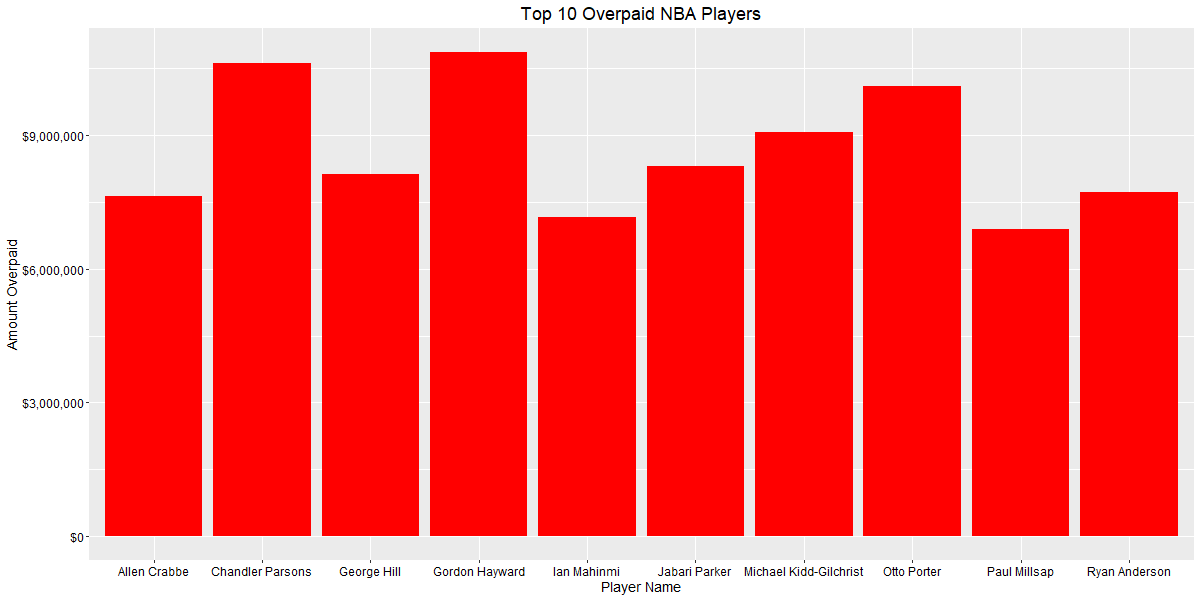

In [98]:
%%R -i top_10_overpaid -w 1200 -h 600 -u px
options(scipen=999)
player_overpaid_bar <- ggplot(top_10_overpaid, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "red") + 
labs(x = "Player Name", y = "Amount Overpaid") + ggtitle("Top 10 Overpaid NBA Players") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour="black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

ggsave(file="player_overpaid_bar.png")
player_overpaid_bar

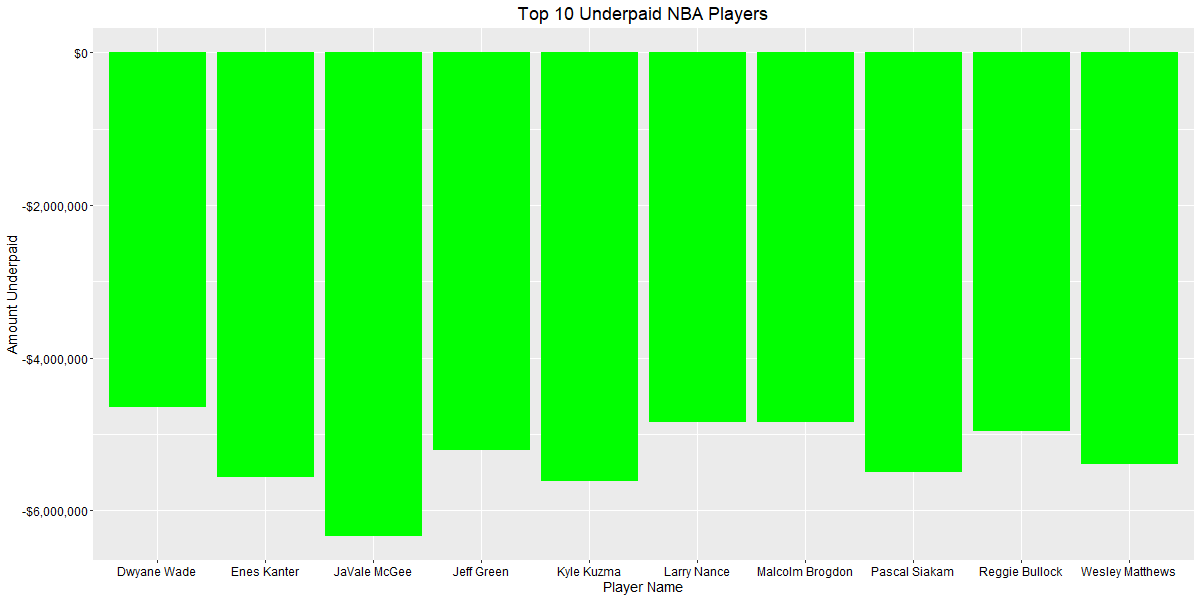

In [99]:
%%R -i top_10_underpaid -w 1200 -h 600 -u px

player_underpaid_bar <- ggplot(top_10_underpaid, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "green") + 
labs(x = "Player Name", y = "Amount Underpaid") + ggtitle("Top 10 Underpaid NBA Players") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour = "black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))
ggsave(file="player_underpaid_bar.png")
player_underpaid_bar